<a href="https://colab.research.google.com/github/merazAfridi/Euro-USD-Exchange-Rate-Prediction/blob/main/Euro_USD_Exchange_Rate_Final_498R_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

# **Data Collection and Processing**

In [4]:
from google.colab import drive
drive.mount('/content/drive')
# loading the csv data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Gold Price CSE499 Dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# print first 5 rows
data.head()

,Date,SPX,GLD,SLV,EUR/USD
0,2/1/1980,105.76,559.5,39.95,1.5149
1,3/1/1980,105.22,634.0,37.00,1.5177
2,4/1/1980,106.52,588.0,32.75,1.5129
3,7/1/1980,106.81,633.5,39.00,1.5168
4,8/1/1980,108.95,610.0,33.52,1.5108


In [7]:
#last 5 rows
data.tail()

,Date,SPX,GLD,SLV,EUR/USD
10577,3/24/2023,3970.99,1978.2000,23.2204,1.0780
10578,3/27/2023,3977.53,1956.5783,23.0129,1.0799
10579,3/28/2023,3971.27,1971.9989,23.3344,1.0842
10580,3/29/2023,4027.81,1962.9123,23.3034,1.0845
10581,3/30/2023,4050.83,1978.4419,23.8752,1.0905


# **Data Exploration and Visualization**

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', ascending=True, inplace=True)
data.reset_index(drop=True, inplace=True)

In [9]:
#no of rows, columns
data.shape

(10582, 5)

In [10]:
#basic info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10582 entries, 0 to 10581
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     10582 non-null  datetime64[ns]
 1   SPX      10581 non-null  float64       
 2   GLD      10398 non-null  float64       
 3   SLV      10573 non-null  float64       
 4   EUR/USD  10550 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 413.5 KB


In [11]:
#no of missing values
data.isnull().sum()

Date         0
SPX          1
GLD        184
SLV          9
EUR/USD     32
dtype: int64

In [12]:
#stats measures of data
data.describe()

,Date,SPX,GLD,SLV,EUR/USD
count,10582,10581.000000,10398.000000,10573.000000,10550.000000
mean,2001-04-03 00:26:40.302400256,1201.387682,481.647612,11.383250,1.159294
min,1980-01-02 00:00:00,98.220000,70.000000,3.548000,0.644400
25%,1990-06-21 06:00:00,342.150000,273.000000,5.173000,1.073700
50%,2000-12-05 12:00:00,1066.109985,366.400000,7.504000,1.167900
75%,2011-12-20 18:00:00,1462.420044,438.437500,16.000000,1.273434
max,2023-12-01 00:00:00,4796.560000,2998.000000,49.450000,1.598798
std,NaN,1061.553355,454.009940,7.887263,0.169976


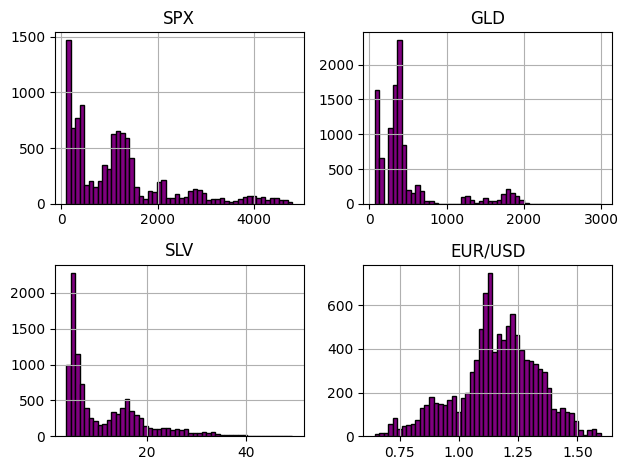

In [13]:
#data frequency
data.hist(column=data.columns[1:], color='purple', edgecolor='black', bins=50)
plt.tight_layout()
plt.show()


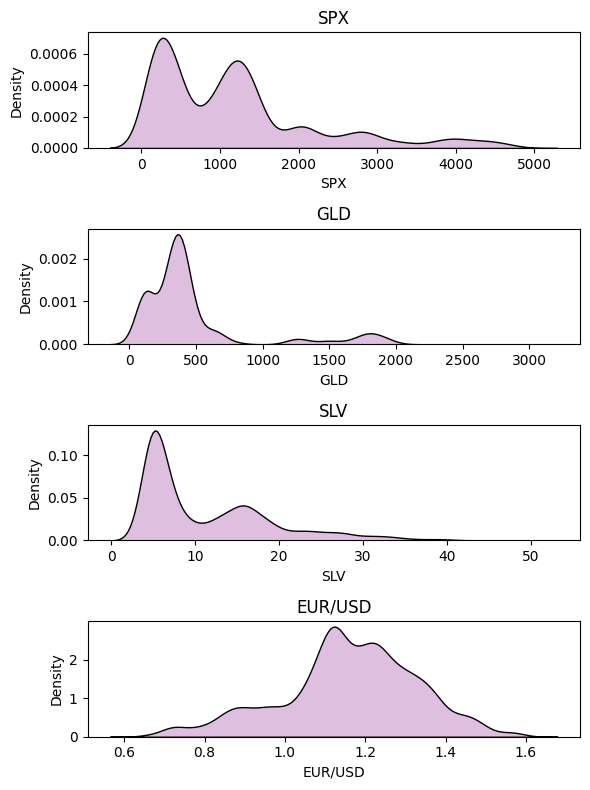

In [14]:
#Data density
import seaborn as sns
import matplotlib.pyplot as plt

#select columns excluding "Date"
cols = data.columns[1:]

#create a figure with subplots
fig, axes = plt.subplots(nrows=len(cols), figsize=(6, 8))
#plot KDE
for i, col in enumerate(cols):
    sns.kdeplot(data[col], ax=axes[i], color='purple', edgecolor='black', fill=True)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

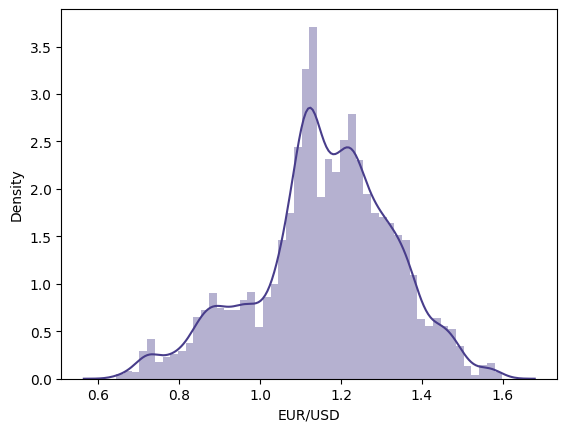

In [15]:
#distribution of EURO/USD
sns.distplot(data['EUR/USD'], color='darkslateblue', bins=50)
plt.show()

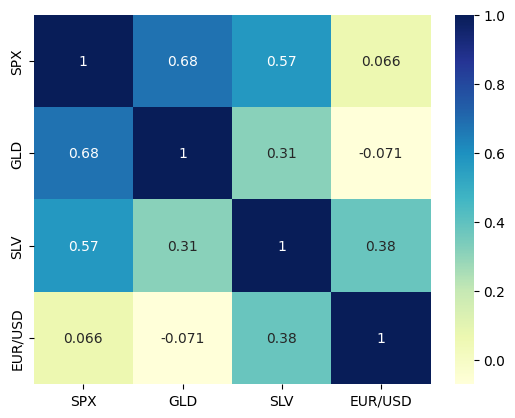

In [16]:
#select columns excluding "Date"
cols = data.columns[1:]

#corr matrix
corr = data[cols].corr()

#heatmap of the corr matrix
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

SPX    0.065687
GLD   -0.071343
SLV    0.376587
Name: EUR/USD, dtype: float64


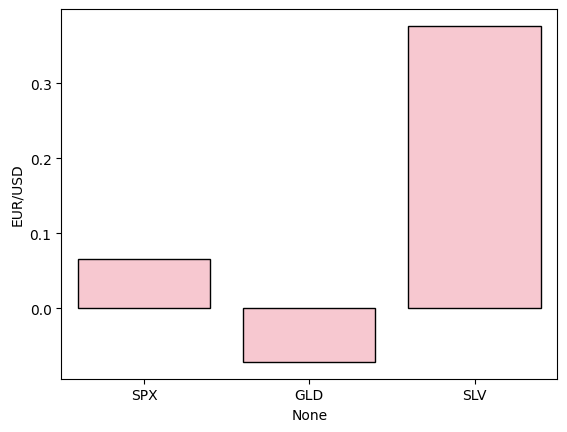

In [17]:
#corr values of EUR/USD
corr_eur_usd = corr['EUR/USD'].drop('EUR/USD')
print(corr_eur_usd)

sns.barplot(x=corr_eur_usd.index, color='pink', edgecolor='black', y=corr_eur_usd)
plt.show()

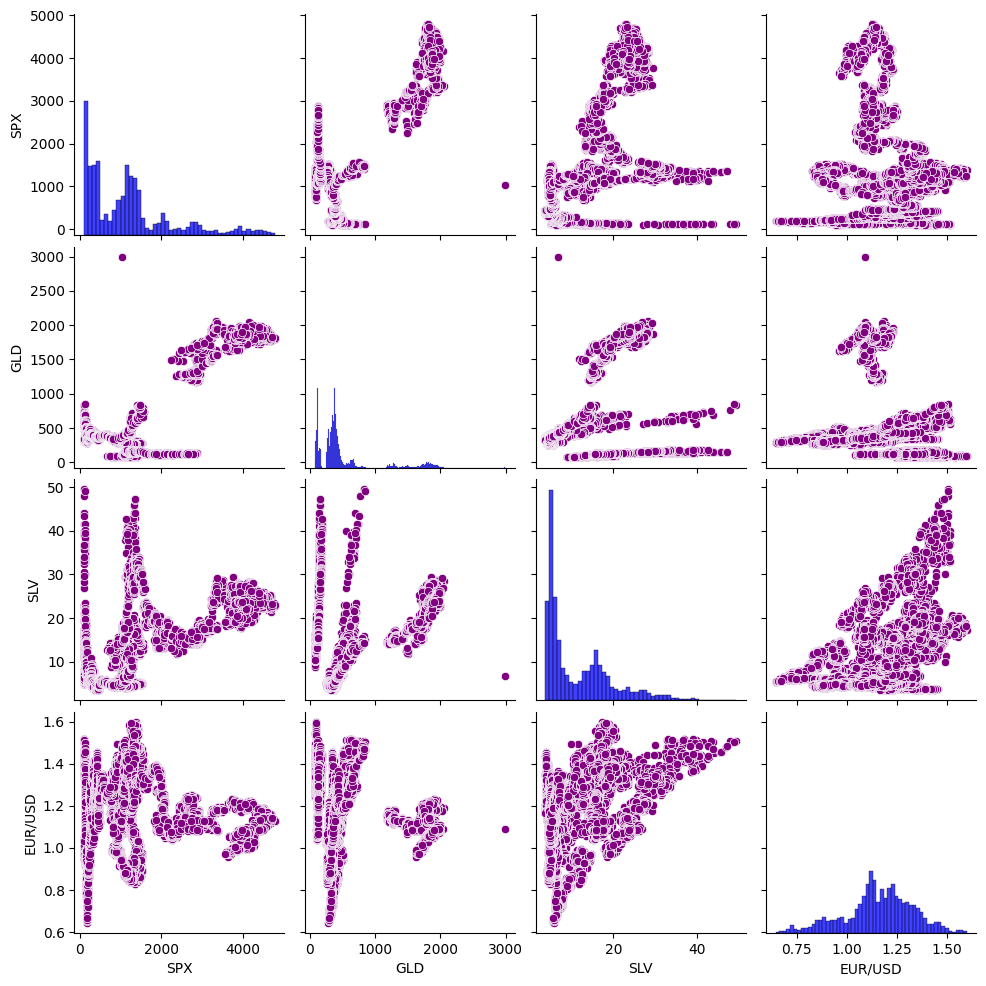

In [18]:
#pairwise relationships
sns.pairplot(data=data, x_vars=cols, y_vars=cols, kind='scatter', plot_kws={'color':'purple'}, diag_kws={'color':'blue'})
plt.show()

**Preprocessing**

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10582 entries, 0 to 10581
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     10582 non-null  datetime64[ns]
 1   SPX      10581 non-null  float64       
 2   GLD      10398 non-null  float64       
 3   SLV      10573 non-null  float64       
 4   EUR/USD  10550 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 413.5 KB


In [20]:
#Dropping null value
data.dropna(inplace = True)



*Outlier Detection and Removal*

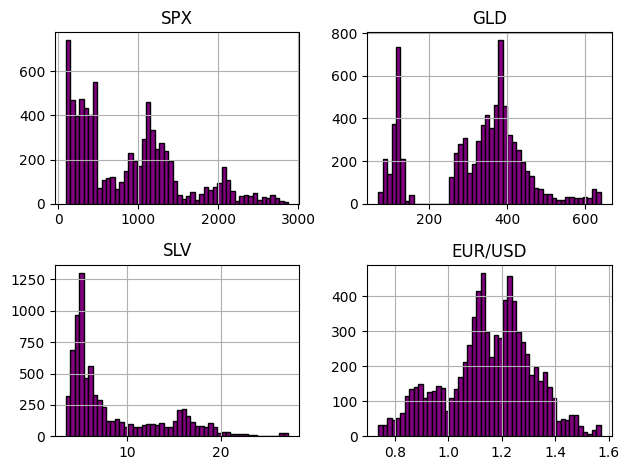

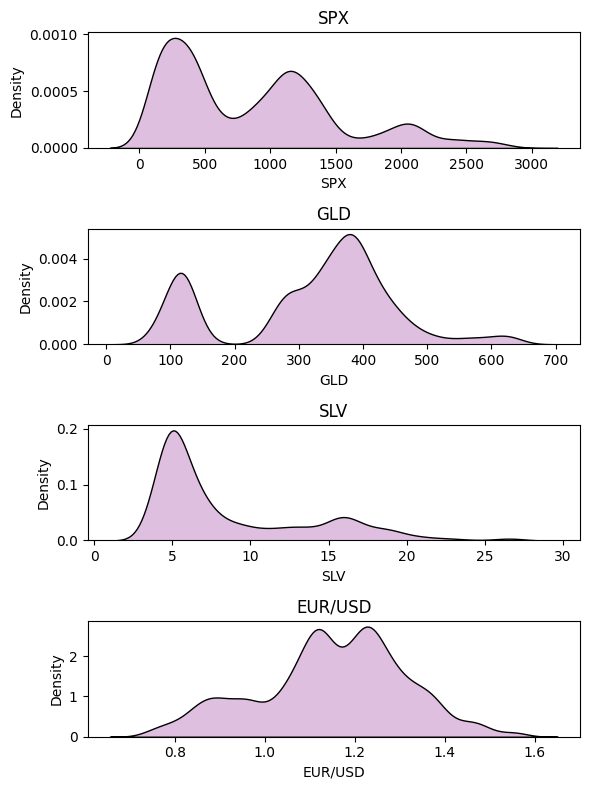

In [21]:
#detect outliers using the interquartile-range (IQR) method
def remove_outliers(df, columns):
  for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lwr_bound = q1-1.5*IQR
    upr_bound = q3+1.5*IQR
    df = df[(df[col] >= lwr_bound) & (df[col] <= upr_bound)]
  return df

#remove outliers
data = remove_outliers(data, cols)

#plotting to show effect of outlier removal
data.hist(column=cols, color='purple', edgecolor='black', bins=50)
plt.tight_layout()
plt.show()

#plotting data density again to show effect of outlier removal
fig, axes = plt.subplots(nrows=len(cols), figsize=(6, 8))
for i, col in enumerate(cols):
  sns.kdeplot(data[col], ax=axes[i], color='purple', edgecolor='black', fill=True)
  axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [22]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
SLV        0
EUR/USD    0
dtype: int64

In [23]:
data.shape

(8111, 5)

In [24]:
#Setting Date as index
data.set_index('Date', inplace=True)

#Splitting Features X and Target Y
X = data.drop(['EUR/USD'], axis=1)
Y = data['EUR/USD']


In [25]:
#Split into Train, Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)


In [26]:
#print train test shape

print(f'Train Data Shape: {X_train.shape}')
print(f'Test Data Shape: {X_test.shape}')


Train Data Shape: (5677, 3)
Test Data Shape: (2434, 3)


In [27]:
#data of train and test set

print("Train set:")
print(X_train)
print(Y_train)

print("\nTest set:")
print(X_test)
print(Y_test)


Train set:
                    SPX         GLD     SLV
Date                                       
1989-11-24   343.970000  415.800000   5.798
2004-02-20  1144.110000  405.250000   6.608
1990-01-18   338.190000  413.400000   5.270
2001-05-07  1219.240000  266.300000   4.260
2003-08-13   984.030000  358.650000   4.870
...                 ...         ...     ...
1995-09-27   581.040000  383.750000   5.455
2004-04-21  1124.090000  392.750000   6.140
2009-07-20   951.130005   93.279999  13.450
1991-07-26   380.930000  364.100000   4.101
2014-11-19  2048.719971  113.680000  15.480

[5677 rows x 3 columns]
Date
1989-11-24    1.132100
2004-02-20    1.253200
1990-01-18    1.188800
2001-05-07    0.838000
2003-08-13    1.132100
                ...   
1995-09-27    1.300000
2004-04-21    1.184500
2009-07-20    1.419850
1991-07-26    1.177400
2014-11-19    1.253337
Name: EUR/USD, Length: 5677, dtype: float64

Test set:
                SPX     GLD    SLV
Date                              
1993-03-0

# **Random Forest**

In [28]:
# Copy train and test sets
X_train_RF = X_train.copy()
X_test_RF = X_test.copy()
Y_train_RF = Y_train.copy()
Y_test_RF = Y_test.copy()


In [29]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFregressor.fit(X_train_RF, Y_train_RF)

RandomForestRegressor(n_estimators=10, random_state=0)

In [30]:
#Prediction and evaluationn
y_pred_RF = RFregressor.predict(X_test_RF)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(Y_test_RF, y_pred_RF)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test_RF, y_pred_RF)
r2 = r2_score(Y_test_RF, y_pred_RF)

# Print the results
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 0.0007595390519525514
Root Mean Squared Error (RMSE): 0.02755973606463878
Mean Absolute Error (MAE): 0.016681599548069023
R-squared (R2): 0.9710625452226337


In [31]:
#a new data point and prediction on it
new_data = pd.DataFrame({
    'SPX': [839.66],
    'GLD': [325.15],
    'SLV': [4.620]
})


single_pred = RFregressor.predict(new_data)

print('Predicted EUR/USD:', single_pred[0])

Predicted EUR/USD: 0.9820599999999999


In [32]:
#KFold cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(RFregressor, X_train_RF, Y_train_RF, cv=5, scoring='r2') #5fold
print("R-squared scores for each fold:", scores)

# Calculate avg R-squared score
average_r2 = scores.mean()
print("Average R-squared score:", average_r2)

R-squared scores for each fold: [0.96812209 0.968918   0.97026581 0.96553974 0.96631293]
Average R-squared score: 0.9678317169600661


In [33]:
#grid search CV to find best param

from sklearn.model_selection import GridSearchCV

# define the param grid to searchOver
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [1, 2, 5]
}

grid_search = GridSearchCV(estimator=RFregressor, param_grid=param_grid, cv=5, scoring='r2')

#Fit
grid_search.fit(X_train_RF, Y_train_RF)

#best param
print("Best Parameters:", grid_search.best_params_)

#best model
best_model = grid_search.best_estimator_

#predictions using best model
y_pred_best_RF = best_model.predict(X_test_RF)

#evaluation for best model
mse_best_RF = mean_squared_error(Y_test_RF, y_pred_best_RF)
rmse_best_RF = np.sqrt(mse_best_RF)
mae_best_RF = mean_absolute_error(Y_test_RF, y_pred_best_RF)
r2_best_RF = r2_score(Y_test_RF, y_pred_best_RF)

print('Best RF Model  - Mean Squared Error (MSE):', mse_best_RF)
print('Best RF Model - Root Mean Squared Error (RMSE):', rmse_best_RF)
print('Best RF Model - Mean Absolute Error (MAE):', mae_best_RF)
print('Best RF Model - R-squared (R2):', r2_best_RF)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best RF Model  - Mean Squared Error (MSE): 0.0007309755567121074
Best RF Model - Root Mean Squared Error (RMSE): 0.027036559631582333
Best RF Model - Mean Absolute Error (MAE): 0.01656446644207066
Best RF Model - R-squared (R2): 0.9721507774204108


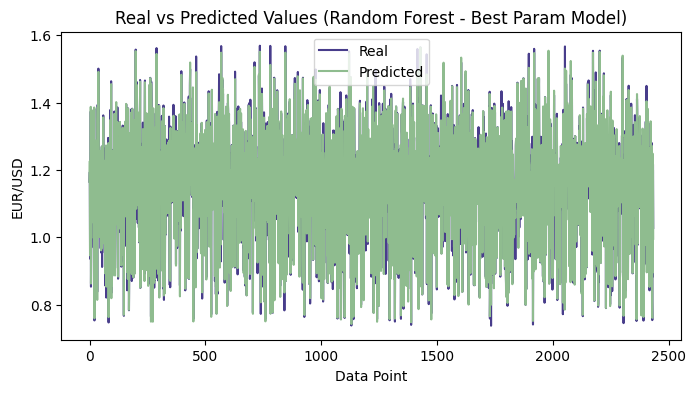

In [34]:
#plotting real vs predicted values
plt.figure(figsize=(8, 4))
plt.plot(Y_test_RF.values, label='Real', color='darkslateblue')
plt.plot(y_pred_best_RF, label='Predicted', color='darkseagreen')
plt.xlabel('Data Point')
plt.ylabel('EUR/USD')
plt.title('Real vs Predicted Values (Random Forest - Best Param Model)')
plt.legend()
plt.show()

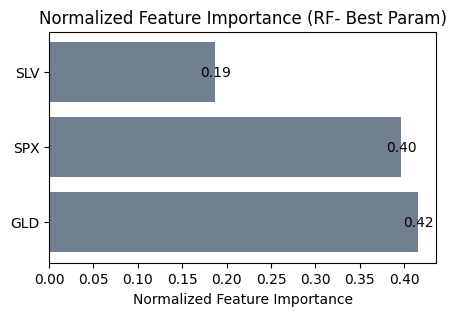

In [35]:
# Feature importance of best param model
importances = best_model.feature_importances_
# Normalize
normalized_importances = importances / np.sum(importances)
sorted_idx = normalized_importances.argsort()[::-1]

# Plotting
plt.figure(figsize=(5, 3))
plt.barh(range(X_test_RF.shape[1]), normalized_importances[sorted_idx], align='center', color='slategrey')
plt.yticks(range(X_test_RF.shape[1]), X_test_RF.columns[sorted_idx])
plt.xlabel('Normalized Feature Importance')
plt.title('Normalized Feature Importance (RF- Best Param)')
for i, v in enumerate(normalized_importances[sorted_idx]):
    plt.text(v, i, "{:.2f}".format(v), va='center', ha='center')

plt.show()

# **KNN**

In [36]:
#copy x y
X_train_KNN = X_train.copy()
X_test_KNN = X_test.copy()
Y_train_KNN = Y_train.copy()
Y_test_KNN = Y_test.copy()


In [37]:
#KNN model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_KNN, Y_train_KNN)
y_pred_knn = knn.predict(X_test_KNN)


In [38]:
#evaluation
mse_knn = metrics.mean_squared_error(Y_test_KNN, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = metrics.mean_absolute_error(Y_test_KNN, y_pred_knn)
r2_knn = metrics.r2_score(Y_test_KNN, y_pred_knn)

print('Mean Squared Error (MSE):', mse_knn)
print('Root Mean Squared Error (RMSE):', rmse_knn)
print('Mean Absolute Error (MAE):', mae_knn)
print('R-squared (R2):', r2_knn)


Mean Squared Error (MSE): 0.002139709399366639
Root Mean Squared Error (RMSE): 0.046256992977998894
Mean Absolute Error (MAE): 0.029091799506984387
R-squared (R2): 0.9184798413962977


In [39]:
# A random data
new_data = pd.DataFrame({
    'SPX': [839.66],
    'GLD': [325.15],
    'SLV': [4.620]
})

# Make single prediction
new_pred = knn.predict(new_data)
print(new_pred)


[0.9893]


In [40]:
#kfold cross val on x train,y train
from sklearn.model_selection import cross_val_score

#k-fold cross-validation 10 folds
cv_scores = cross_val_score(knn, X_train_KNN, Y_train_KNN, cv=5, scoring='r2')
print("Cross-validation R-squared scores:", cv_scores)

# Calculate avg R-squared score
average_r2 = np.mean(cv_scores)
print("Average cross-validation R-squared:", average_r2)


Cross-validation R-squared scores: [0.91954401 0.91632695 0.91687584 0.91128355 0.92384412]
Average cross-validation R-squared: 0.9175748949871458


In [41]:
#grid search
from sklearn.model_selection import GridSearchCV

#define parameter grid to search over
param_grid = {'n_neighbors': range(1, 20)} #different values for k= 1-20
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')

# fit the grid search
grid_search.fit(X_train_KNN, Y_train_KNN)
print("Best hyperparameters:", grid_search.best_params_)

#best model
best_knn_model = grid_search.best_estimator_

#evaluate the best model
y_pred_best_KNN = best_knn_model.predict(X_test_KNN)

#evaluation for best model
mse_best_KNN = mean_squared_error(Y_test_KNN, y_pred_best_KNN)
rmse_best_KNN = np.sqrt(mse_best_KNN)
mae_best_KNN = mean_absolute_error(Y_test_KNN, y_pred_best_KNN)
r2_best_KNN = r2_score(Y_test_KNN, y_pred_best_KNN)

print('Best KNN Model - Mean Squared Error (MSE):', mse_best_KNN)
print('Best KNN Model - Root Mean Squared Error (RMSE):', rmse_best_KNN)
print('Best KNN Model - Mean Absolute Error (MAE):', mae_best_KNN)
print('Best KNN Model - R-squared (R2):', r2_best_KNN)


Best hyperparameters: {'n_neighbors': 6}
Best KNN Model - Mean Squared Error (MSE): 0.0021555182460773984
Best KNN Model - Root Mean Squared Error (RMSE): 0.046427559122544856
Best KNN Model - Mean Absolute Error (MAE): 0.029653590523144344
Best KNN Model - R-squared (R2): 0.9178775447986456


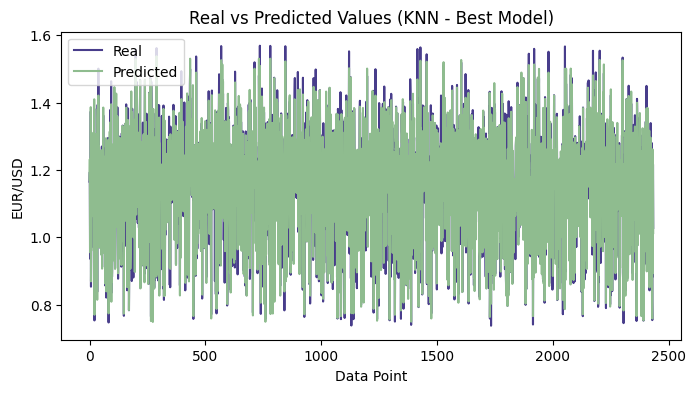

In [42]:
#real vs predicted values
plt.figure(figsize=(8, 4))
plt.plot(Y_test_KNN.values, label='Real', color='darkslateblue')
plt.plot(y_pred_best_KNN, label='Predicted', color='darkseagreen')
plt.xlabel('Data Point')
plt.ylabel('EUR/USD')
plt.title('Real vs Predicted Values (KNN - Best Model)')
plt.legend()
plt.show()


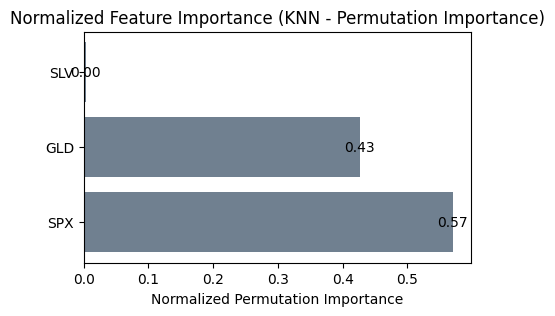

In [43]:
#KNN doesn't have a built-in feature importance attribute so we use permutation importance instead
from sklearn.inspection import permutation_importance

#calculate permutation importance
result = permutation_importance(best_knn_model, X_test_KNN, Y_test_KNN, n_repeats=30, random_state=0)
#feature importances
importance = result.importances_mean
#normalize feature importances
normalized_importance = importance / np.sum(importance)
sorted_idx_normalized = normalized_importance.argsort()[::-1]

# Plot normalized feature importances
plt.figure(figsize=(5, 3))
plt.barh(range(X_test_KNN.shape[1]), normalized_importance[sorted_idx_normalized], align='center', color='slategrey')
plt.yticks(range(X_test_KNN.shape[1]), X_test_KNN.columns[sorted_idx_normalized])
plt.xlabel('Normalized Permutation Importance')
plt.title('Normalized Feature Importance (KNN - Permutation Importance)')
for i, v in enumerate(normalized_importance[sorted_idx_normalized]):
    plt.text(v, i, "{:.2f}".format(v), va='center', ha='center')

plt.show()

# **DecisionTree**

In [44]:
#copy x and y data
X_train_DT = X_train.copy()
X_test_DT = X_test.copy()
Y_train_DT = Y_train.copy()
Y_test_DT = Y_test.copy()


In [45]:
#DT model
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
#fit
dt_regressor.fit(X_train_DT, Y_train_DT)


DecisionTreeRegressor(random_state=42)

In [46]:
# Predict and evaluate
y_pred_dt = dt_regressor.predict(X_test_DT)

mse_dt = metrics.mean_squared_error(Y_test_DT, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = metrics.mean_absolute_error(Y_test_DT, y_pred_dt)
r2_dt = metrics.r2_score(Y_test_DT, y_pred_dt)

print('Mean Squared Error (MSE):', mse_dt)
print('Root Mean Squared Error (RMSE):', rmse_dt)
print('Mean Absolute Error (MAE):', mae_dt)
print('R-squared (R2):', r2_dt)

Mean Squared Error (MSE): 0.0013752186843829085
Root Mean Squared Error (RMSE): 0.037083941057860996
Mean Absolute Error (MAE): 0.01925872884141331
R-squared (R2): 0.9476059481260147


In [47]:
#a random data predict
new_data = pd.DataFrame({'SPX': [839.66],'GLD': [325.15],'SLV': [4.620]})

new_prediction_dt = dt_regressor.predict(new_data)
print(new_prediction_dt)


[0.9782]


In [48]:
#K-fold cross-validation
cv_scores_dt = cross_val_score(dt_regressor, X_train_DT, Y_train_DT, cv=5, scoring='r2')  #5folds
print("Cross-validation R-squared scores:", cv_scores_dt)

#calculate avg R-squared score
average_r2_dt = np.mean(cv_scores_dt)
print("Average cross-validation R-squared:", average_r2_dt)


Cross-validation R-squared scores: [0.94764119 0.95498522 0.93917679 0.95095825 0.94432545]
Average cross-validation R-squared: 0.9474173810892186


In [49]:
#GridCV to find best param
#define the param grid to searchOver
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='r2')

#fit grid search to trainingSet
grid_search_dt.fit(X_train_DT, Y_train_DT)
print("Best hyperparam:", grid_search_dt.best_params_)

#best model
best_dt_model = grid_search_dt.best_estimator_

#evaluation best model on testset
y_pred_best_DT = best_dt_model.predict(X_test_DT)

#evaluation for best model
mse_best_DT = mean_squared_error(Y_test_DT, y_pred_best_DT)
rmse_best_DT = np.sqrt(mse_best_DT)
mae_best_DT = mean_absolute_error(Y_test_DT, y_pred_best_DT)
r2_best_DT = r2_score(Y_test_DT, y_pred_best_DT)

print('Best DT Model - Mean Squared Error (MSE):', mse_best_DT)
print('Best DT Model - Root Mean Squared Error (RMSE):', rmse_best_DT)
print('Best DT Model - Mean Absolute Error (MAE):', mae_best_DT)
print('Best DT Model - R-squared (R2):', r2_best_DT)


Best hyperparam: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best DT Model - Mean Squared Error (MSE): 0.0011137269417122603
Best DT Model - Root Mean Squared Error (RMSE): 0.0333725477258219
Best DT Model - Mean Absolute Error (MAE): 0.018728479972523727
Best DT Model - R-squared (R2): 0.9575684450624583


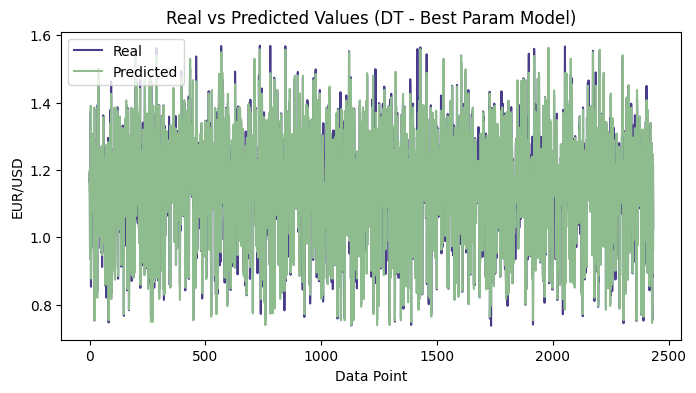

In [50]:
#plotting real vs predicted values
plt.figure(figsize=(8, 4))
plt.plot(Y_test_DT.values, label='Real', color='darkslateblue')
plt.plot(y_pred_best_DT, label='Predicted', color='darkseagreen')
plt.xlabel('Data Point')
plt.ylabel('EUR/USD')
plt.title('Real vs Predicted Values (DT - Best Param Model)')
plt.legend()
plt.show()

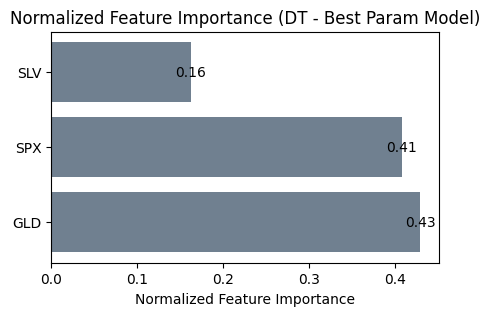

In [51]:
# Feature importance of best param model
importances = best_dt_model.feature_importances_
# Normalize
normalized_importances = importances / np.sum(importances)
sorted_idx = normalized_importances.argsort()[::-1]

# Plotting
plt.figure(figsize=(5, 3))
plt.barh(range(X_test_DT.shape[1]), normalized_importances[sorted_idx], align='center', color='slategrey')
plt.yticks(range(X_test_DT.shape[1]), X_test_DT.columns[sorted_idx])
plt.xlabel('Normalized Feature Importance')
plt.title('Normalized Feature Importance (DT - Best Param Model)')
for i, v in enumerate(normalized_importances[sorted_idx]):
    plt.text(v, i, "{:.2f}".format(v), va='center', ha='center')

plt.show()

# **SVM**

In [52]:
#copy x and y sata
X_train_SVM = X_train.copy()
X_test_SVM = X_test.copy()
Y_train_SVM = Y_train.copy()
Y_test_SVM = Y_test.copy()

In [53]:
#svm
from sklearn.svm import SVR
svm_regressor = SVR(kernel='rbf', epsilon=0.05, gamma=0.001)
#train
svm_regressor.fit(X_train_SVM, Y_train_SVM)

SVR(epsilon=0.05, gamma=0.001)

In [54]:
# Predict and evaluate
y_pred_svm = svm_regressor.predict(X_test_SVM)

mse_svm = metrics.mean_squared_error(Y_test_SVM, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
mae_svm = metrics.mean_absolute_error(Y_test_SVM, y_pred_svm)
r2_svm = metrics.r2_score(Y_test_SVM, y_pred_svm)

print('Mean Squared Error (MSE):', mse_svm)
print('Root Mean Squared Error (RMSE):', rmse_svm)
print('Mean Absolute Error (MAE):', mae_svm)
print('R-squared (R2):', r2_svm)

Mean Squared Error (MSE): 0.0021456637328312795
Root Mean Squared Error (RMSE): 0.046321309705483066
Mean Absolute Error (MAE): 0.03611159719609812
R-squared (R2): 0.9182529889982288


In [55]:
# predict on a random data
new_data = pd.DataFrame({'SPX': [839.66],'GLD': [325.15],'SLV': [4.620]})

new_prediction_svm = svm_regressor.predict(new_data)
print(new_prediction_svm)


[1.03861298]


In [56]:
#kfold cross val on x train and y train
from sklearn.model_selection import cross_val_score

cv_scores_svm = cross_val_score(svm_regressor, X_train_SVM, Y_train_SVM, cv=10, scoring='r2')  # 10 folds
print("Cross-validation R-squared scores:", cv_scores_svm)

# Calculate avg R-squared score
average_r2_svm = np.mean(cv_scores_svm)
print("Average cross-validation R-squared:", average_r2_svm)


Cross-validation R-squared scores: [0.92519715 0.91966954 0.92800468 0.91074839 0.9214456  0.90466635
 0.91472259 0.92438793 0.92777517 0.92411172]
Average cross-validation R-squared: 0.9200729110924056


In [57]:
#GridSearchCV
#define param grid to searchOver
param_grid_svm = {
    'kernel': ['rbf'],
    'epsilon' : [0.0001, 0.001, 0.01],
    'gamma': [0.001, 0.01, 0.05]
}

grid_search_svm = GridSearchCV(SVR(), param_grid_svm, cv=5, scoring='r2')

#fit
grid_search_svm.fit(X_train_SVM, Y_train_SVM)
print("Best hyperparam:", grid_search_svm.best_params_)

#best model
best_svm_model = grid_search_svm.best_estimator_
#evaluate best model on test set
y_pred_best_SVM = best_svm_model.predict(X_test_SVM)

#evaluation for best model
mse_best_SVM = mean_squared_error(Y_test_SVM, y_pred_best_SVM)
rmse_best_SVM = np.sqrt(mse_best_SVM)
mae_best_SVM = mean_absolute_error(Y_test_SVM, y_pred_best_SVM)
r2_best_SVM = r2_score(Y_test_SVM, y_pred_best_SVM)

print('Best RF Model  - Mean Squared Error (MSE):', mse_best_SVM)
print('Best RF Model - Root Mean Squared Error (RMSE):', rmse_best_SVM)
print('Best RF Model - Mean Absolute Error (MAE):', mae_best_SVM)
print('Best RF Model - R-squared (R2):', r2_best_SVM)


Best hyperparam: {'epsilon': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
Best RF Model  - Mean Squared Error (MSE): 0.0018243460129850353
Best RF Model - Root Mean Squared Error (RMSE): 0.0427123637016852
Best RF Model - Mean Absolute Error (MAE): 0.02777013950318014
Best RF Model - R-squared (R2): 0.9304947782298877


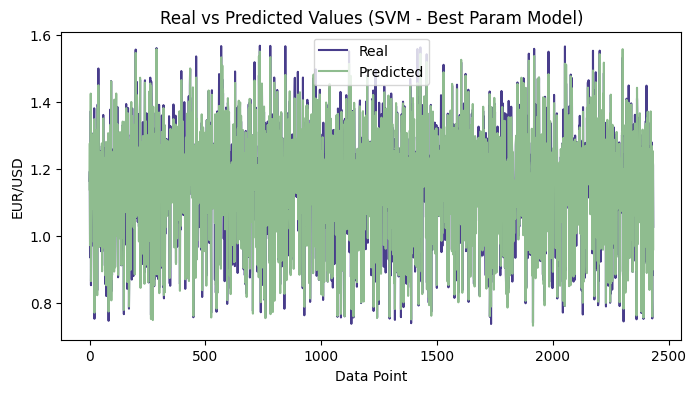

In [58]:
#plotting real vs predicted values
plt.figure(figsize=(8, 4))
plt.plot(Y_test_SVM.values, label='Real', color='darkslateblue')
plt.plot(y_pred_best_SVM , label='Predicted', color='darkseagreen')
plt.xlabel('Data Point')
plt.ylabel('EUR/USD')
plt.title('Real vs Predicted Values (SVM - Best Param Model)')
plt.legend()
plt.show()


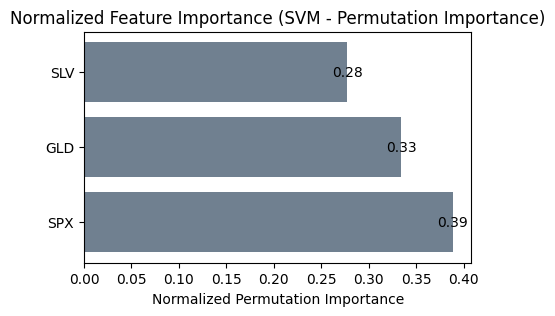

In [59]:
#SVM doesn't have a built-in feature importance attribute so we use permutation importance
#permutation importance
result = permutation_importance(best_svm_model, X_test_SVM, Y_test_SVM, n_repeats=30, random_state=0)

#feature importances
importance = result.importances_mean
#normalize
normalized_importance = importance / np.sum(importance)
sorted_idx_normalized = normalized_importance.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(5, 3))
plt.barh(range(X_test_SVM.shape[1]), normalized_importance[sorted_idx_normalized], align='center', color='slategrey')
plt.yticks(range(X_test_SVM.shape[1]), X_test_SVM.columns[sorted_idx_normalized])
plt.xlabel('Normalized Permutation Importance')
plt.title('Normalized Feature Importance (SVM - Permutation Importance)')
for i, v in enumerate(normalized_importance[sorted_idx_normalized]):
    plt.text(v, i, "{:.2f}".format(v), va='center', ha='center')

plt.show()

# **ExtraTrees**

In [60]:
#Copy X, Y
X_train_ET = X_train.copy()
X_test_ET = X_test.copy()
Y_train_ET = Y_train.copy()
Y_test_ET = Y_test.copy()

In [61]:
#ExtraTress
from sklearn.ensemble import ExtraTreesRegressor
# Initialize ExtraTreesRegressor
et_model = ExtraTreesRegressor(n_estimators=50, max_depth=15,  min_samples_leaf=5)
et_model.fit(X_train_ET, Y_train_ET)
#Fit
et_model.fit(X_train_ET, Y_train_ET)

ExtraTreesRegressor(max_depth=15, min_samples_leaf=5, n_estimators=50)

In [62]:
#make predictions and evaluation
y_pred_et = et_model.predict(X_test_ET)

mse_et = metrics.mean_squared_error(Y_test_ET, y_pred_et)
rmse_et = np.sqrt(mse_et)
mae_et = metrics.mean_absolute_error(Y_test_ET, y_pred_et)
r2_et = metrics.r2_score(Y_test_ET, y_pred_et)
print('ExtraTrees Regressor Performance:')
print('Mean Squared Error (MSE):', mse_et)
print('Root Mean Squared Error (RMSE):', rmse_et)
print('Mean Absolute Error (MAE):', mae_et)
print('R-squared (R2):', r2_et)


ExtraTrees Regressor Performance:
Mean Squared Error (MSE): 0.0009252080836353605
Root Mean Squared Error (RMSE): 0.03041723333301963
Mean Absolute Error (MAE): 0.022142253976990354
R-squared (R2): 0.9647507695476275


In [63]:
#predict on a single data
new_data = pd.DataFrame({
    'SPX': [839.66],
    'GLD': [325.15],
    'SLV': [4.620]
})
new_pred = et_model.predict(new_data)
print(new_pred)

[1.02863585]


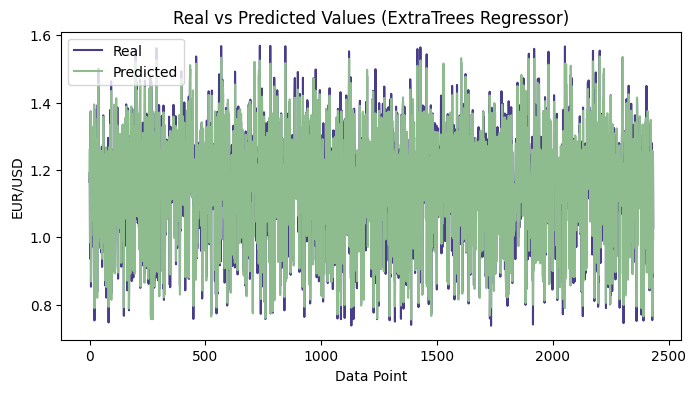

In [64]:
#plotting real vs predicted values
plt.figure(figsize=(8, 4))
plt.plot(Y_test_ET.values, label='Real', color='darkslateblue')
plt.plot(y_pred_et, label='Predicted', color='darkseagreen')
plt.xlabel('Data Point')
plt.ylabel('EUR/USD')
plt.title('Real vs Predicted Values (ExtraTrees Regressor)')
plt.legend()
plt.show()


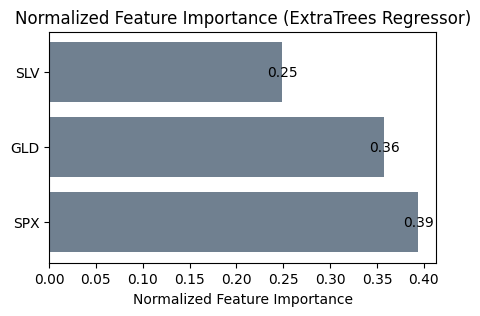

In [65]:
# feature importances
importances = et_model.feature_importances_
#Normalize
normalized_importances = importances / np.sum(importances)
sorted_idx = normalized_importances.argsort()[::-1]
# Plotting
plt.figure(figsize=(5, 3))
plt.barh(range(X_test_ET.shape[1]), normalized_importances[sorted_idx], align='center', color='slategrey')
plt.yticks(range(X_test_ET.shape[1]), X_test_ET.columns[sorted_idx])
plt.xlabel('Normalized Feature Importance')
plt.title('Normalized Feature Importance (ExtraTrees Regressor)')
for i, v in enumerate(normalized_importances[sorted_idx]):
    plt.text(v, i, "{:.2f}".format(v), va='center', ha='center')

plt.show()

# **AdaBoost**

In [66]:
#copy X and Y data

X_train_Ada = X_train.copy()
X_test_Ada = X_test.copy()
Y_train_Ada = Y_train.copy()
Y_test_Ada = Y_test.copy()

In [67]:
#adaboost
from sklearn.ensemble import AdaBoostRegressor
#initialize DT Regressor as base estimator
base_estimator = DecisionTreeRegressor(max_depth=15, min_samples_leaf=1, min_samples_split=10)
#initialize AdaBoost
adaboost_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)

adaboost_regressor.fit(X_train_Ada, Y_train_Ada)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15,
                                                       min_samples_split=10),
                  random_state=42)

In [68]:
#Make predictions and evaluation
y_pred_ada = adaboost_regressor.predict(X_test_Ada)

mse_ada = metrics.mean_squared_error(Y_test_Ada, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
mae_ada = metrics.mean_absolute_error(Y_test_Ada, y_pred_ada)
r2_ada = metrics.r2_score(Y_test_Ada, y_pred_ada)
print('AdaBoost Regressor Performance:')
print('Mean Squared Error (MSE):', mse_ada)
print('Root Mean Squared Error (RMSE):', rmse_ada)
print('Mean Absolute Error (MAE):', mae_ada)
print('R-squared (R2):', r2_ada)

AdaBoost Regressor Performance:
Mean Squared Error (MSE): 0.0006054484309811524
Root Mean Squared Error (RMSE): 0.024605861719946987
Mean Absolute Error (MAE): 0.0146783520635107
R-squared (R2): 0.9769331984359391


In [69]:
# predict on a single data
new_data = pd.DataFrame({'SPX': [839.66],'GLD': [325.15], 'SLV': [4.620]})

new_pred = adaboost_regressor.predict(new_data)
print(new_pred)

[1.0084]


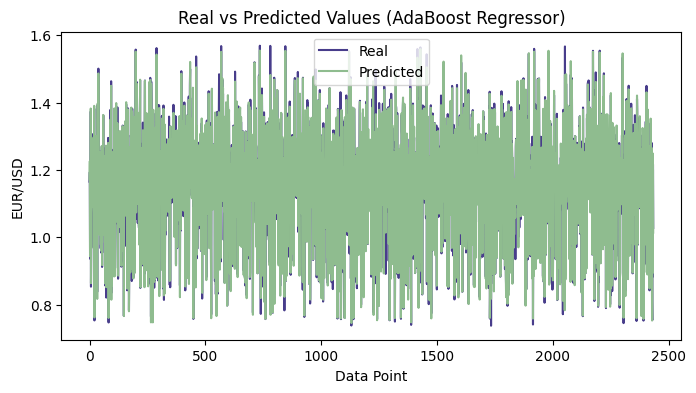

In [70]:
#plotting real vs predicted
plt.figure(figsize=(8, 4))
plt.plot(Y_test_Ada.values, label='Real', color='darkslateblue')
plt.plot(y_pred_ada, label='Predicted', color='darkseagreen')
plt.xlabel('Data Point')
plt.ylabel('EUR/USD')
plt.title('Real vs Predicted Values (AdaBoost Regressor)')
plt.legend()
plt.show()

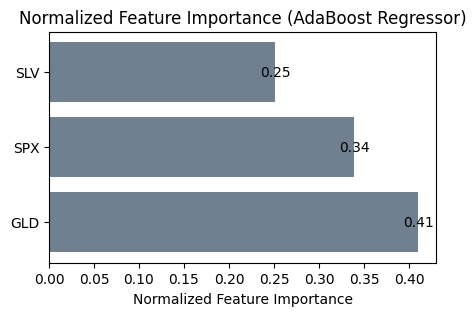

In [71]:
# feature importances
importances = adaboost_regressor.feature_importances_
# Normalize
normalized_importances = importances / np.sum(importances)
sorted_idx = normalized_importances.argsort()[::-1]

# Plotting
plt.figure(figsize=(5, 3))
plt.barh(range(X_test_Ada.shape[1]), normalized_importances[sorted_idx], align='center', color='slategrey')
plt.yticks(range(X_test_Ada.shape[1]), X_test_Ada.columns[sorted_idx])
plt.xlabel('Normalized Feature Importance')
plt.title('Normalized Feature Importance (AdaBoost Regressor)')
for i, v in enumerate(normalized_importances[sorted_idx]):
    plt.text(v, i, "{:.2f}".format(v), va='center', ha='center')

plt.show()


# **Voting**

In [72]:
# Copy X and Y

X_train_Voting = X_train.copy()
X_test_Voting = X_test.copy()
Y_train_Voting = Y_train.copy()
Y_test_Voting = Y_test.copy()


In [73]:
#votingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#initialize individual model (with best hyperparameter of each model)
model1 = DecisionTreeRegressor( max_depth=15, min_samples_leaf=1, min_samples_split=10)
model2 = RandomForestRegressor( max_depth=None, min_samples_split= 2, n_estimators= 200)
model3 = KNeighborsRegressor(n_neighbors= 6)
model4 = SVR( epsilon= 0.01, gamma= 0.001, kernel= 'rbf')

#initialize voting regressor
voting_regressor = VotingRegressor(estimators=[
   ('dt', model2), ('rf', model2), ('knn', model3), ('svm', model4)
])

voting_regressor.fit(X_train_Voting, Y_train_Voting)



VotingRegressor(estimators=[('dt', RandomForestRegressor(n_estimators=200)),
                            ('rf', RandomForestRegressor(n_estimators=200)),
                            ('knn', KNeighborsRegressor(n_neighbors=6)),
                            ('svm', SVR(epsilon=0.01, gamma=0.001))])

In [74]:
#make predictions on the testset
y_pred_voting = voting_regressor.predict(X_test_Voting)

# evaluation
mse_voting = metrics.mean_squared_error(Y_test_Voting, y_pred_voting)
rmse_voting = np.sqrt(mse_voting)
mae_voting = metrics.mean_absolute_error(Y_test_Voting, y_pred_voting)
r2_voting = metrics.r2_score(Y_test_Voting, y_pred_voting)

print('Voting Regressor Performance:')
print('Mean Squared Error (MSE):', mse_voting)
print('Root Mean Squared Error (RMSE):', rmse_voting)
print('Mean Absolute Error (MAE):', mae_voting)
print('R-squared (R2) :', r2_voting)


Voting Regressor Performance:
Mean Squared Error (MSE): 0.000975619906703592
Root Mean Squared Error (RMSE): 0.031234914866277323
Mean Absolute Error (MAE): 0.02093807461402595
R-squared (R2) : 0.9628301443387836


In [75]:
# predict on sinngle data
new_data = pd.DataFrame({
    'SPX': [839.66],
    'GLD': [325.15],
    'SLV': [4.620]
})

new_pred = voting_regressor.predict(new_data)
print(new_pred)


[0.99445587]


In [76]:
# kfold cross val on x train, y train

cv_scores = cross_val_score(voting_regressor, X_train_Voting, Y_train_Voting, cv=5, scoring='r2')  # 5 folds
print("Cross-validation R-squared scores:", cv_scores)

#calculate the average R-squared score
average_r2 = np.mean(cv_scores)
print("Average cross-validation R-squared:", average_r2)


Cross-validation R-squared scores: [0.96150644 0.96232689 0.96251601 0.95864033 0.96245356]
Average cross-validation R-squared: 0.9614886459006449


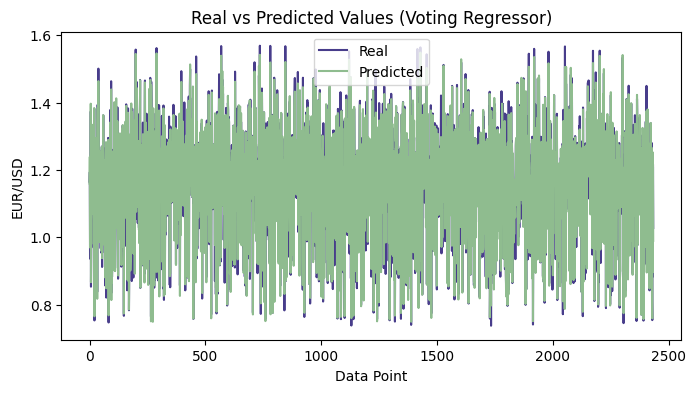

In [77]:
#real vs predicted values
plt.figure(figsize=(8, 4))
plt.plot(Y_test_Voting.values, label='Real', color='darkslateblue')
plt.plot(y_pred_voting, label='Predicted', color='darkseagreen')
plt.xlabel('Data Point')
plt.ylabel('EUR/USD')
plt.title('Real vs Predicted Values (Voting Regressor)')
plt.legend()
plt.show()


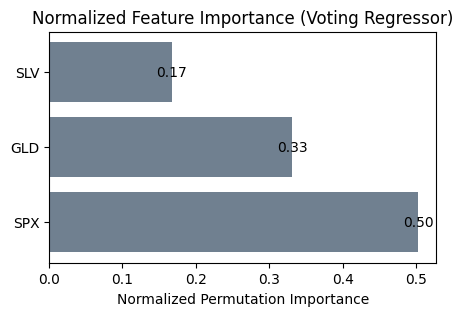

In [78]:
#calculate permutation importance
result = permutation_importance(voting_regressor, X_test_Voting, Y_test_Voting, n_repeats=30, random_state=0)

# Get feature importances
importance = result.importances_mean
#normalize
normalized_importance = importance / np.sum(importance)
sorted_idx_normalized = normalized_importance.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(5, 3))
plt.barh(range(X_test_Voting.shape[1]), normalized_importance[sorted_idx_normalized], align='center', color='slategrey')
plt.yticks(range(X_test_Voting.shape[1]), X_test_Voting.columns[sorted_idx_normalized])
plt.xlabel('Normalized Permutation Importance')
plt.title('Normalized Feature Importance (Voting Regressor)')
for i, v in enumerate(normalized_importance[sorted_idx_normalized]):
    plt.text(v, i, "{:.2f}".format(v), va='center', ha='center')

plt.show()

# **Stacked Generalization**

In [79]:
# copy x and y data
X_train_Stacked = X_train.copy()
X_test_Stacked = X_test.copy()
Y_train_Stacked = Y_train.copy()
Y_test_Stacked = Y_test.copy()

In [80]:
#Stacked Generalization (final estimator gradient boosting)
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
#base models
base_models = [
    ('dt', DecisionTreeRegressor(max_depth=15, min_samples_leaf=1, min_samples_split=10)),
    ('rf', RandomForestRegressor(max_depth=20, min_samples_split=2, n_estimators=200)),
    ('knn', KNeighborsRegressor(n_neighbors=6)),
    ('svm', SVR(epsilon=0.01, gamma=0.001, kernel='rbf'))]

#final estimator
final_estimator = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
#stacking
stacked_regressor = StackingRegressor(estimators=base_models,final_estimator=final_estimator)
stacked_regressor.fit(X_train_Stacked, Y_train_Stacked)


StackingRegressor(estimators=[('dt',
                               DecisionTreeRegressor(max_depth=15,
                                                     min_samples_split=10)),
                              ('rf',
                               RandomForestRegressor(max_depth=20,
                                                     n_estimators=200)),
                              ('knn', KNeighborsRegressor(n_neighbors=6)),
                              ('svm', SVR(epsilon=0.01, gamma=0.001))],
                  final_estimator=GradientBoostingRegressor(max_depth=5))

In [81]:
#predictions and evaluation
y_pred_stacked = stacked_regressor.predict(X_test_Stacked)

mse_stacked = metrics.mean_squared_error(Y_test_Stacked, y_pred_stacked)
rmse_stacked = np.sqrt(mse_stacked)
mae_stacked = metrics.mean_absolute_error(Y_test_Stacked, y_pred_stacked)
r2_stacked = metrics.r2_score(Y_test_Stacked, y_pred_stacked)
print('Stacked Regressor Performance:')
print('Mean Squared Error (MSE):', mse_stacked)
print('Root Mean Squared Error (RMSE):', rmse_stacked)
print('Mean Absolute Error (MAE):', mae_stacked)
print('R-squared (R2):', r2_stacked)

Stacked Regressor Performance:
Mean Squared Error (MSE): 0.0007424810186957869
Root Mean Squared Error (RMSE): 0.02724850488918221
Mean Absolute Error (MAE): 0.01717984916383463
R-squared (R2): 0.9717124342108161


In [82]:
# predict on a random data
new_data = pd.DataFrame({'SPX': [839.66],'GLD': [325.15],'SLV': [4.620]})

new_pred = stacked_regressor.predict(new_data)
print(new_pred)


[0.98892868]


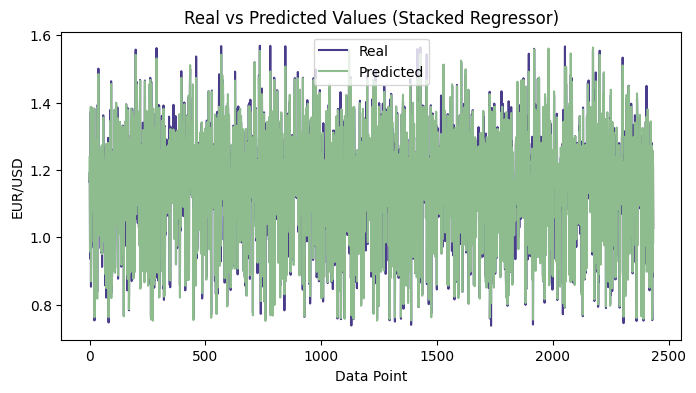

In [83]:
#plotting real vs predicted
plt.figure(figsize=(8, 4))
plt.plot(Y_test_Stacked.values, label='Real', color='darkslateblue')
plt.plot(y_pred_stacked, label='Predicted', color='darkseagreen')
plt.xlabel('Data Point')
plt.ylabel('EUR/USD')
plt.title('Real vs Predicted Values (Stacked Regressor)')
plt.legend()
plt.show()

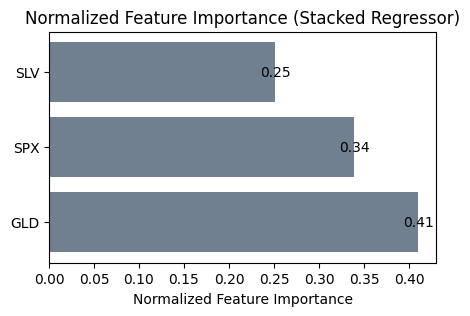

In [84]:
# feature importances
feature_importances = stacked_regressor.final_estimator_.feature_importances_
#normalize
normalized_importances = importances / np.sum(importances)
sorted_idx = normalized_importances.argsort()[::-1]

# Plotting
plt.figure(figsize=(5, 3))
plt.barh(range(X_test_Stacked.shape[1]), normalized_importances[sorted_idx], align='center', color='slategrey')
plt.yticks(range(X_test_Stacked.shape[1]), X_test_Stacked.columns[sorted_idx])
plt.xlabel('Normalized Feature Importance')
plt.title('Normalized Feature Importance (Stacked Regressor)')
for i, v in enumerate(normalized_importances[sorted_idx]):
    plt.text(v, i, "{:.2f}".format(v), va='center', ha='center')

plt.show()

# **XGBOOST**

In [87]:
# Copy x and y data
X_train_XGB = X_train.copy()
X_test_XGB = X_test.copy()
Y_train_XGB = Y_train.copy()
Y_test_XGB = Y_test.copy()


In [88]:
# XGBoost
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators=500, subsample=0.5, random_state=42)

#Fit model
xgb_model.fit(X_train_XGB, Y_train_XGB)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [89]:
# predictions and evaluation
y_pred_xgb = xgb_model.predict(X_test_XGB)

mse_xgb = metrics.mean_squared_error(Y_test_XGB, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = metrics.mean_absolute_error(Y_test_XGB, y_pred_xgb)
r2_xgb = metrics.r2_score(Y_test_XGB, y_pred_xgb)

print('XGBoost Regressor Performance:')
print('Mean Squared Error (MSE):', mse_xgb)
print('Root Mean Squared Error (RMSE):', rmse_xgb)
print('Mean Absolute Error (MAE):', mae_xgb)
print('R-squared (R2):', r2_xgb)

XGBoost Regressor Performance:
Mean Squared Error (MSE): 0.0008329467682138901
Root Mean Squared Error (RMSE): 0.028860817178553523
Mean Absolute Error (MAE): 0.01948677744736119
R-squared (R2): 0.9682658062476442


In [90]:
# prediction on a single data
new_data = pd.DataFrame({'SPX': [839.66],'GLD': [325.15],'SLV': [4.620]})

new_pred_xgb = xgb_model.predict(new_data)

# Print the predictions
print(new_pred_xgb)


[1.0016904]


In [91]:
#kfold cross val on x train and y train
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X_train_XGB, Y_train_XGB, cv=5)  # 5 folds
print("Cross-validation scores:", scores)

# Print avg score R2
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [0.9641453  0.96495226 0.96096626 0.95447443 0.96261156]
Average cross-validation score: 0.9614299611553625


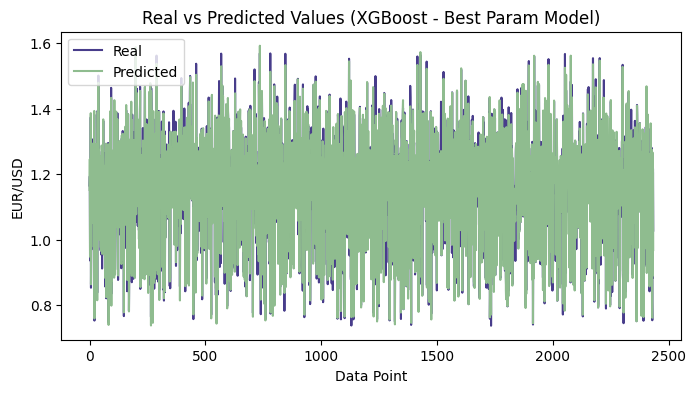

In [92]:
#plotting real vs predicted values
plt.figure(figsize=(8, 4))
plt.plot(Y_test_XGB.values, label='Real', color='darkslateblue')
plt.plot(y_pred_xgb, label='Predicted', color='darkseagreen')
plt.xlabel('Data Point')
plt.ylabel('EUR/USD')
plt.title('Real vs Predicted Values (XGBoost - Best Param Model)')
plt.legend()
plt.show()


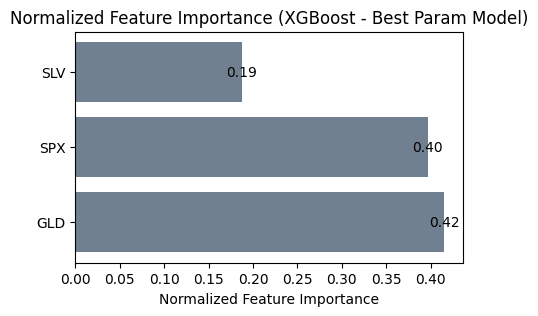

In [93]:
# Feature importance of best param model
importances = best_model.feature_importances_
# Normalize
normalized_importances = importances / np.sum(importances)
sorted_idx = normalized_importances.argsort()[::-1]

# Plotting
plt.figure(figsize=(5, 3))
plt.barh(range(X_test_XGB.shape[1]), normalized_importances[sorted_idx], align='center', color='slategrey')
plt.yticks(range(X_test_XGB.shape[1]), X_test_XGB.columns[sorted_idx])
plt.xlabel('Normalized Feature Importance')
plt.title('Normalized Feature Importance (XGBoost - Best Param Model)')
for i, v in enumerate(normalized_importances[sorted_idx]):
    plt.text(v, i, "{:.2f}".format(v), va='center', ha='center')

plt.show()

# **ANN**

In [94]:
# copy train test data
X_train_ANN = X_train.copy()
X_test_ANN = X_test.copy()
Y_train_ANN = Y_train.copy()
Y_test_ANN = Y_test.copy()


In [95]:
# feature scallling on X train and X test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ANN)
X_test_scaled = scaler.transform(X_test_ANN)


In [96]:
#building ANN
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    #layer1
    keras.layers.Dense(124, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    #layer2
    keras.layers.Dense(64, activation='relu'),
    # Output layer (Regression, so no activation function)
    keras.layers.Dense(1)
])

#compile
model.compile(optimizer='adam', loss='mean_squared_error')

#500 epochs, batchsize=32
model.fit(X_train_scaled, Y_train_ANN, epochs=500, batch_size=32, validation_split=0.2)




Epoch 1/500
142/142 [==============================] - 1s 4ms/step - loss: 0.0948 - val_loss: 0.0111
Epoch 2/500
142/142 [==============================] - 0s 3ms/step - loss: 0.0103 - val_loss: 0.0087
Epoch 3/500
142/142 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0072
Epoch 4/500
142/142 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0063
Epoch 5/500
142/142 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0055
Epoch 6/500
142/142 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 7/500
142/142 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 8/500
142/142 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0050
Epoch 9/500
142/142 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 10/500
142/142 [==============================] - 0s 3ms/step - loss: 0.0045 - val_lo

In [97]:
#ANN model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 124)               496       
                                                                 
 dense_1 (Dense)             (None, 64)                8000      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8561 (33.44 KB)
Trainable params: 8561 (33.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
#prediction on testSet
y_pred_ANN = model.predict(X_test_scaled)

77/77 [==============================] - 0s 2ms/step


In [99]:

#evaluation
mse_ann = metrics.mean_squared_error(Y_test_ANN, y_pred_ANN)
rmse_ann = np.sqrt(mse_ann)
mae_ann = metrics.mean_absolute_error(Y_test_ANN, y_pred_ANN)
r2_ann = metrics.r2_score(Y_test_ANN, y_pred_ANN)

print('ANN Regressor Performance:')
print('Mean Squared Error (MSE):', mse_ann)
print('Root Mean Squared Error (RMSE):', rmse_ann)
print('Mean Absolute Error (MAE):', mae_ann)
print('R-squared (R2):', r2_ann)

ANN Regressor Performance:
Mean Squared Error (MSE): 0.0012402400498592388
Root Mean Squared Error (RMSE): 0.03521704203733242
Mean Absolute Error (MAE): 0.025770872239503882
R-squared (R2): 0.9527484593930764


In [100]:
#predict on a single random data
new_data = pd.DataFrame({ 'SPX': [839.66],'GLD': [325.15],'SLV': [4.620]})

#Scale new data
new_data_scaled = scaler.transform(new_data)

# Make predictions
single_prediction_ANN = model.predict(new_data_scaled)
print('Predicted EUR/USD (ANN):', single_prediction_ANN[0][0])


1/1 [==============================] - 0s 27ms/step
Predicted EUR/USD (ANN): 1.0067215


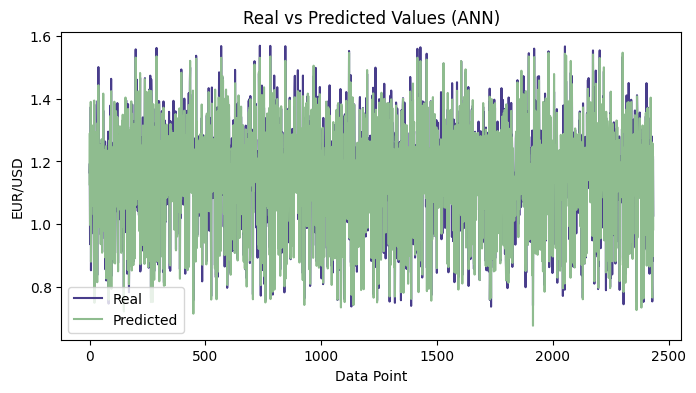

In [101]:
#plotting real vs predicted values
plt.figure(figsize=(8, 4))
plt.plot(Y_test_ANN.values, label='Real', color='darkslateblue')
plt.plot(y_pred_ANN, label='Predicted', color='darkseagreen')
plt.xlabel('Data Point')
plt.ylabel('EUR/USD')
plt.title('Real vs Predicted Values (ANN)')
plt.legend()
plt.show()

In [112]:
# Permutation Importance for ANN
from sklearn.inspection import permutation_importance
#use make_scorer to create scorer which works with permutation importance
from sklearn.metrics import make_scorer, mean_squared_error

# Create scorer function from mse
mse_scorer = make_scorer(mean_squared_error)
result = permutation_importance(model, X_test_scaled, Y_test_ANN, n_repeats=30, random_state=0, scoring=mse_scorer)

# Feature importances
importance = result.importances_mean
# Normalize
normalized_importance = importance / np.sum(importance)
sorted_idx_normalized = normalized_importance.argsort()[::-1]



77/77 [==============================] - 0s 2ms/step


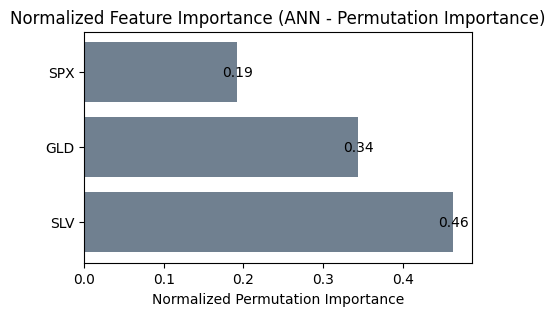

In [113]:
# Plot feature importances ANN
plt.figure(figsize=(5, 3))
plt.barh(range(X_test_ANN.shape[1]), normalized_importance[sorted_idx_normalized], align='center', color='slategrey')
plt.yticks(range(X_test_ANN.shape[1]), X_test_ANN.columns[sorted_idx_normalized])
plt.xlabel('Normalized Permutation Importance')
plt.title('Normalized Feature Importance (ANN - Permutation Importance)')
for i, v in enumerate(normalized_importance[sorted_idx_normalized]):
    plt.text(v, i, "{:.2f}".format(v), va='center', ha='center')

plt.show()

# **Overall Evaluation**

In [103]:
# ALL models R2 Scores:
print("*"*15, "R-squared of ALL Models", "*"*15)
print('\n')
print('Decision Tree Regressor R-squared (R2):', r2_best_DT)
print("-"*50)
print('Random Forest Regressor R-squared (R2):', r2_best_RF)
print("-"*50)
print('K-Nearest Neighbors Regressor R-squared (R2):', r2_best_KNN)
print("-"*50)
print('Support Vector Regressor R-squared (R2):', r2_best_SVM)
print("-"*50)
print('ExtraTrees Regressor R-squared (R2):', r2_et)
print("-"*50)
print('AdaBoost Regressor R-squared (R2):', r2_ada)
print("-"*50)
print('Voting Regressor R-squared (R2):', r2_voting)
print("-"*50)
print('Stacked Regressor R-squared (R2):', r2_stacked)
print("-"*50)
print('XGBoost Regressor R-squared (R2):', r2_xgb)
print("-"*50)
print('ANN Regressor R-squared (R2):', r2_ann)
print("-"*50)

*************** R-squared of ALL Models ***************


Decision Tree Regressor R-squared (R2): 0.9575684450624583
--------------------------------------------------
Random Forest Regressor R-squared (R2): 0.9721507774204108
--------------------------------------------------
K-Nearest Neighbors Regressor R-squared (R2): 0.9178775447986456
--------------------------------------------------
Support Vector Regressor R-squared (R2): 0.9304947782298877
--------------------------------------------------
ExtraTrees Regressor R-squared (R2): 0.9647507695476275
--------------------------------------------------
AdaBoost Regressor R-squared (R2): 0.9769331984359391
--------------------------------------------------
Voting Regressor R-squared (R2): 0.9628301443387836
--------------------------------------------------
Stacked Regressor R-squared (R2): 0.9717124342108161
--------------------------------------------------
XGBoost Regressor R-squared (R2): 0.9682658062476442
-----------------------

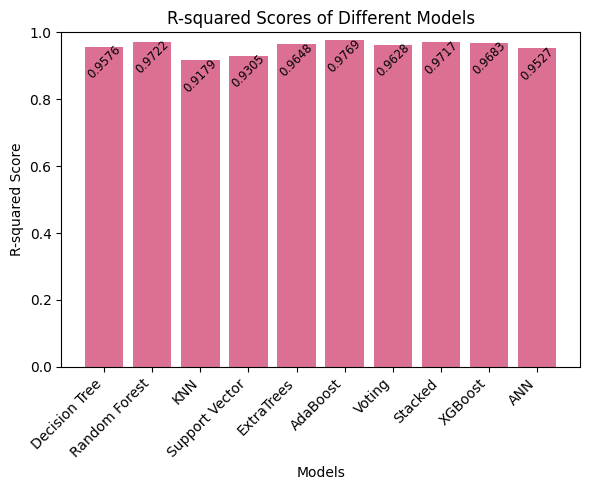

In [115]:
# ALL models R2 Scores:
models = ['Decision Tree', 'Random Forest', 'KNN', 'Support Vector',
          'ExtraTrees', 'AdaBoost', 'Voting', 'Stacked', 'XGBoost', 'ANN']
r2_scores = [r2_best_DT, r2_best_RF, r2_best_KNN, r2_best_SVM, r2_et, r2_ada,
             r2_voting, r2_stacked, r2_xgb, r2_ann]

plt.figure(figsize=(6, 5))
plt.bar(models, r2_scores, color='palevioletred')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores of Different Models')
plt.ylim(0, 1)  # y-axis limits between 0-1 for R2
plt.xticks(rotation=45, ha='right')  #Rotate x-axis labels

#display R2 values on top
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, "{:.4f}".format(v), ha='center', va='top', fontsize='small' , rotation=45 )

plt.tight_layout()
plt.show()


In [105]:
# ALL models MSE Scores:
print("*"*15, "MSE of ALL Models", "*"*15)
print('\n')
print('Decision Tree Regressor MSE:', mse_best_DT)
print("-"*50)
print('Random Forest Regressor MSE:', mse_best_RF)
print("-"*50)
print('K-Nearest Neighbors Regressor MSE:', mse_best_KNN)
print("-"*50)
print('Support Vector Regressor MSE:', mse_best_SVM)
print("-"*50)
print('ExtraTrees Regressor MSE:', mse_et)
print("-"*50)
print('AdaBoost Regressor MSE:', mse_ada)
print("-"*50)
print('Voting Regressor MSE:', mse_voting)
print("-"*50)
print('Stacked Regressor MSE:', mse_stacked)
print("-"*50)
print('XGBoost Regressor MSE:', mse_xgb)
print("-"*50)
print('ANN Regressor MSE:', mse_ann)
print("-"*50)

*************** MSE of ALL Models ***************


Decision Tree Regressor MSE: 0.0011137269417122603
--------------------------------------------------
Random Forest Regressor MSE: 0.0007309755567121074
--------------------------------------------------
K-Nearest Neighbors Regressor MSE: 0.0021555182460773984
--------------------------------------------------
Support Vector Regressor MSE: 0.0018243460129850353
--------------------------------------------------
ExtraTrees Regressor MSE: 0.0009252080836353605
--------------------------------------------------
AdaBoost Regressor MSE: 0.0006054484309811524
--------------------------------------------------
Voting Regressor MSE: 0.000975619906703592
--------------------------------------------------
Stacked Regressor MSE: 0.0007424810186957869
--------------------------------------------------
XGBoost Regressor MSE: 0.0008329467682138901
--------------------------------------------------
ANN Regressor MSE: 0.0012402400498592388
----------

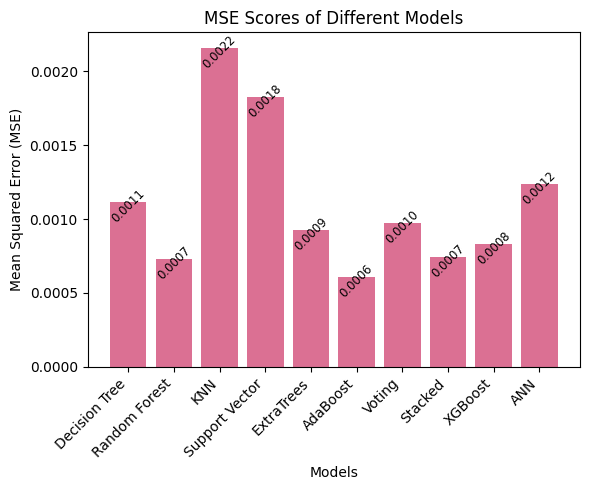

In [106]:
# ALL models MSE Scores:
models = ['Decision Tree', 'Random Forest', 'KNN', 'Support Vector',
          'ExtraTrees', 'AdaBoost', 'Voting', 'Stacked', 'XGBoost', 'ANN']
mse_scores = [mse_best_DT, mse_best_RF, mse_best_KNN, mse_best_SVM, mse_et, mse_ada,
             mse_voting, mse_stacked, mse_xgb, mse_ann]

plt.figure(figsize=(6, 5))
plt.bar(models, mse_scores, color='palevioletred')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Scores of Different Models')
plt.xticks(rotation=45, ha='right')  #Rotate x-axis labels

#display MSE values on top
for i, v in enumerate(mse_scores):
    plt.text(i, v + 0.0001, "{:.4f}".format(v), ha='center', va='top', fontsize='small' , rotation=45 )

plt.tight_layout()
plt.show()


In [107]:
# ALL models RMSE Scores:
print("*"*15, "RMSE of ALL Models", "*"*15)
print('\n')
print('Decision Tree Regressor RMSE:', rmse_best_DT)
print("-"*50)
print('Random Forest Regressor RMSE:', rmse_best_RF)
print("-"*50)
print('K-Nearest Neighbors Regressor RMSE:', rmse_best_KNN)
print("-"*50)
print('Support Vector Regressor RMSE:', rmse_best_SVM)
print("-"*50)
print('ExtraTrees Regressor RMSE:', rmse_et)
print("-"*50)
print('AdaBoost Regressor RMSE:', rmse_ada)
print("-"*50)
print('Voting Regressor RMSE:', rmse_voting)
print("-"*50)
print('Stacked Regressor RMSE:', rmse_stacked)
print("-"*50)
print('XGBoost Regressor RMSE:', rmse_xgb)
print("-"*50)
print('ANN Regressor RMSE:', rmse_ann)
print("-"*50)

*************** RMSE of ALL Models ***************


Decision Tree Regressor RMSE: 0.0333725477258219
--------------------------------------------------
Random Forest Regressor RMSE: 0.027036559631582333
--------------------------------------------------
K-Nearest Neighbors Regressor RMSE: 0.046427559122544856
--------------------------------------------------
Support Vector Regressor RMSE: 0.0427123637016852
--------------------------------------------------
ExtraTrees Regressor RMSE: 0.03041723333301963
--------------------------------------------------
AdaBoost Regressor RMSE: 0.024605861719946987
--------------------------------------------------
Voting Regressor RMSE: 0.031234914866277323
--------------------------------------------------
Stacked Regressor RMSE: 0.02724850488918221
--------------------------------------------------
XGBoost Regressor RMSE: 0.028860817178553523
--------------------------------------------------
ANN Regressor RMSE: 0.03521704203733242
---------------

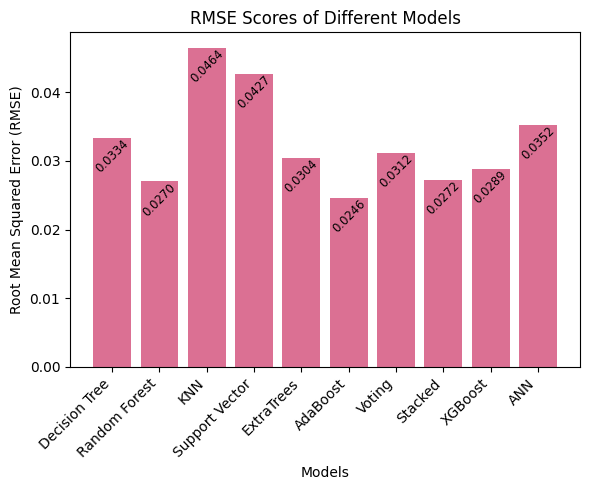

In [108]:
# ALL models RMSE Scores:
models = ['Decision Tree', 'Random Forest', 'KNN', 'Support Vector',
          'ExtraTrees', 'AdaBoost', 'Voting', 'Stacked', 'XGBoost', 'ANN']
rmse_scores = [rmse_best_DT, rmse_best_RF, rmse_best_KNN, rmse_best_SVM, rmse_et, rmse_ada,
             rmse_voting, rmse_stacked, rmse_xgb, rmse_ann]

plt.figure(figsize=(6, 5))
plt.bar(models, rmse_scores, color='palevioletred')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE Scores of Different Models')
plt.xticks(rotation=45, ha='right')  #Rotate x-axis labels

#display RMSE values on top
for i, v in enumerate(rmse_scores):
    plt.text(i, v + 0.0001, "{:.4f}".format(v), ha='center', va='top', fontsize='small' , rotation=45 )

plt.tight_layout()
plt.show()

In [109]:
# ALL models MAE Scores:
print("*"*15, "MAE of ALL Models", "*"*15)
print('\n')
print('Decision Tree Regressor MAE:', mae_best_DT)
print("-"*50)
print('Random Forest Regressor MAE:', mae_best_RF)
print("-"*50)
print('K-Nearest Neighbors Regressor MAE:', mae_best_KNN)
print("-"*50)
print('Support Vector Regressor MAE:', mae_best_SVM)
print("-"*50)
print('ExtraTrees Regressor MAE:', mae_et)
print("-"*50)
print('AdaBoost Regressor MAE:', mae_ada)
print("-"*50)
print('Voting Regressor MAE:', mae_voting)
print("-"*50)
print('Stacked Regressor MAE:', mae_stacked)
print("-"*50)
print('XGBoost Regressor MAE:', mae_xgb)
print("-"*50)
print('ANN Regressor MAE:', mae_ann)
print("-"*50)

*************** MAE of ALL Models ***************


Decision Tree Regressor MAE: 0.018728479972523727
--------------------------------------------------
Random Forest Regressor MAE: 0.01656446644207066
--------------------------------------------------
K-Nearest Neighbors Regressor MAE: 0.029653590523144344
--------------------------------------------------
Support Vector Regressor MAE: 0.02777013950318014
--------------------------------------------------
ExtraTrees Regressor MAE: 0.022142253976990354
--------------------------------------------------
AdaBoost Regressor MAE: 0.0146783520635107
--------------------------------------------------
Voting Regressor MAE: 0.02093807461402595
--------------------------------------------------
Stacked Regressor MAE: 0.01717984916383463
--------------------------------------------------
XGBoost Regressor MAE: 0.01948677744736119
--------------------------------------------------
ANN Regressor MAE: 0.025770872239503882
--------------------------

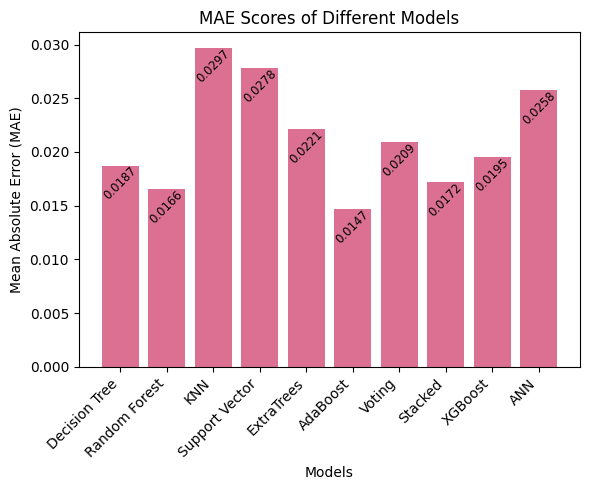

In [110]:
# ALL models MAE Scores:
models = ['Decision Tree', 'Random Forest', 'KNN', 'Support Vector',
          'ExtraTrees', 'AdaBoost', 'Voting', 'Stacked', 'XGBoost', 'ANN']
mae_scores = [mae_best_DT, mae_best_RF, mae_best_KNN, mae_best_SVM, mae_et, mae_ada,
             mae_voting, mae_stacked, mae_xgb, mae_ann]

plt.figure(figsize=(6, 5))
plt.bar(models, mae_scores, color='palevioletred')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Scores of Different Models')
plt.xticks(rotation=45, ha='right')  #Rotate x-axis labels

#display MAE values on top
for i, v in enumerate(mae_scores):
    plt.text(i, v + 0.0001, "{:.4f}".format(v), ha='center', va='top', fontsize='small' , rotation=45 )

plt.tight_layout()
plt.show()

In [111]:
#highest and lowest R2 scores; their corresponding models
highest_r2 = max(r2_scores)
lowest_r2 = min(r2_scores)

highest_r2_model = models[r2_scores.index(highest_r2)]
lowest_r2_model = models[r2_scores.index(lowest_r2)]
print("-"*45)
print('\n')
print("*"*8, "Highest R2 and , Lowest R2", "*"*8)

print(f"Highest R-squared: {highest_r2:.5f} (Model: {highest_r2_model})")
print(f"Lowest R-squared: {lowest_r2:.5f} (Model: {lowest_r2_model})")
print("-"*45)

# lowest and highest MSE scores; their corresponding models
highest_mse = max(mse_scores)
lowest_mse = min(mse_scores)

highest_mse_model = models[mse_scores.index(highest_mse)]
lowest_mse_model = models[mse_scores.index(lowest_mse)]
print('\n')
print("*"*8, "Lowest MSE, Highest MSE", "*"*8)

print(f"Lowest MSE: {lowest_mse:.5f} (Model: {lowest_mse_model})")
print(f"Highest MSE: {highest_mse:.5f} (Model: {highest_mse_model})")
print("-"*45)

# lowest and higest RMSE scores; their corresponding models
highest_rmse = max(rmse_scores)
lowest_rmse = min(rmse_scores)

highest_rmse_model = models[rmse_scores.index(highest_rmse)]
lowest_rmse_model = models[rmse_scores.index(lowest_rmse)]
print("*"*8, "Lowest RMSE, Highest RMSE", "*"*8)
print('\n')
print(f"Lowest RMSE: {lowest_rmse:.5f} (Model: {lowest_rmse_model})")
print(f"Highest RMSE: {highest_rmse:.5f} (Model: {highest_rmse_model})")
print("-"*45)

#lowest and highest MAE scores; their corresponding models
highest_mae = max(mae_scores)
lowest_mae = min(mae_scores)

highest_mae_model = models[mae_scores.index(highest_mae)]
lowest_mae_model = models[mae_scores.index(lowest_mae)]
print("*"*8, "Lowest MAE, Highest MAE", "*"*8)
print('\n')
print(f"Lowest MAE: {lowest_mae:.5f} (Model: {lowest_mae_model})")
print(f"Highest MAE: {highest_mae:.5f} (Model: {highest_mae_model})")
print("-"*45)


---------------------------------------------


******** Highest R2 and , Lowest R2 ********
Highest R-squared: 0.97693 (Model: AdaBoost)
Lowest R-squared: 0.91788 (Model: KNN)
---------------------------------------------


******** Lowest MSE, Highest MSE ********
Lowest MSE: 0.00061 (Model: AdaBoost)
Highest MSE: 0.00216 (Model: KNN)
---------------------------------------------
******** Lowest RMSE, Highest RMSE ********


Lowest RMSE: 0.02461 (Model: AdaBoost)
Highest RMSE: 0.04643 (Model: KNN)
---------------------------------------------
******** Lowest MAE, Highest MAE ********


Lowest MAE: 0.01468 (Model: AdaBoost)
Highest MAE: 0.02965 (Model: KNN)
---------------------------------------------
